# 机器学习 实验四  
**题目：朴素贝叶斯**  
实验条件：Most Popular Data Set 中的 wine 数据集（对意大利同一地区声场的三种不同品种的酒做大量
分析所得出的数据）  
实验要求：  
1. 基本要求：
   1. 采用分层采样的方式将数据集划分为训练集和测试集。
   2. 给定编写一个朴素贝叶斯分类器，对测试集进行预测，计算分类准确率。
2. 中级要求：使用测试集评估模型，得到混淆矩阵，精度，召回率，F值。
3. 高级要求：在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值。
4. 拓展要求：浅谈ROC曲线和AUC值作为分类评价的合理性。

# 导入需要的包

In [32]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 基本要求

In [107]:
# 按类别提取数据
f = open('wine.data', 'r')
data = []
types = [[],[],[]]
data_num = 178
type_num = [59, 71, 48]
for i in range(data_num):
    data.append(f.readline().split(','))
    data[i][13].rstrip('\n')
for i in range(data_num):
    for j in range(14):
        if j==0:
            data[i][j] = int(data[i][j])
        else:
            data[i][j] = float(data[i][j])
    type = data[i].pop(0)
    types[type-1].append(data[i])

In [173]:
# 分层采样，将数据集划为训练集和测试集
x_train = [[],[],[]]
x_test = [[],[],[]]
train_num = []
test_num = []
for i in range(3):
    num = int(len(types[i])*2/3) # 按训练集:测试集为 2:1 比例划分
    train_num.append(num)
    test_num.append(len(types[i])-num)
    random.shuffle(types[i])
    x_train[i] = types[i][:num]
    x_test[i] = types[i][num:]
    print("第", i+1, "类样本训练集大小：",train_num[i]," 测试集大小：",test_num[i])

第 1 类样本训练集大小： 39  测试集大小： 20
第 2 类样本训练集大小： 47  测试集大小： 24
第 3 类样本训练集大小： 32  测试集大小： 16


In [110]:
# 朴素贝叶斯公式，计算数据在某一类别下的概率
def Bayes(data, p, mean, var):
    res = p
    for i in range(len(data)):
        res /= math.sqrt(2*math.pi) * var[i]
        res *= math.exp(-pow((data[i]-mean[i]),2) / (2*pow(var[i],2)))
    return res

In [174]:
# 均值和方差
means = [[],[],[]]
vars = [[],[],[]]
for i in range(3):
    means[i] = np.mean(x_train[i], axis=0)
    vars[i] = np.std(x_train[i], axis=0)

train_total_num = np.sum(train_num)
p = [len(x_train[i])/train_total_num for i in range(3)]

print(p)
print(means[0])
print(vars[0])

[0.3305084745762712, 0.3983050847457627, 0.2711864406779661]
[1.36710256e+01 1.94153846e+00 2.45128205e+00 1.71743590e+01
 1.06743590e+02 2.89641026e+00 3.03717949e+00 2.86666667e-01
 1.96128205e+00 5.65641026e+00 1.05871795e+00 3.20743590e+00
 1.12402564e+03]
[4.55748440e-01 5.68364899e-01 2.31994468e-01 2.78169087e+00
 1.08479419e+01 3.46376756e-01 3.74446249e-01 6.93683344e-02
 4.41339334e-01 1.26131898e+00 1.07945368e-01 3.46977557e-01
 2.14565570e+02]


In [114]:
def Bayes_classifier():
    wrong_num = 0
    p_pred = [] # 样本属于不同类别的概率
    y_pred = [] # 预测类别
    y_test = [] # 实际类别
    for i in range(3):
        for x in x_test[i]: # 对每个样本，计算它属于每个类别的概率，取最大值
            tmp_type = []
            for j in range(3):
                tmp = Bayes(x, p[j], means[j], vars[j])
                #print(tmp)
                tmp_type.append(tmp)
            #print(tmp_type)
            p_pred.append(tmp_type)
            pre_type = tmp_type.index(max(tmp_type))
            y_pred.append(pre_type)
            y_test.append(i)
            if pre_type!=i:
                wrong_num+=1
    return wrong_num, y_test, y_pred, p_pred

In [175]:
wrong_num, y_test, y_pred, p_pred = Bayes_classifier()
print("实际类别为：",y_test)
print("预测结果为：",y_pred)
print("预测错误个数为：",wrong_num)
accuracy = 1 - wrong_num/(data_num-train_total_num)
print("朴素贝叶斯分类器的准确率为：",accuracy)

实际类别为： [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
预测结果为： [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
预测错误个数为： 4
朴素贝叶斯分类器的准确率为： 0.9333333333333333


# 中级要求

In [105]:
# 计算混淆矩阵
def confusion_mat(y_test,y_pred):
    confusion = np.zeros((3,3))
    for i in range(len(y_test)):
        confusion[y_test[i]][y_pred[i]] += 1
    confusion = np.array(confusion)
    return confusion

In [176]:
confusion_matrix = confusion_mat(y_test,y_pred)
print("混淆矩阵：\n", confusion_matrix)

# 计算精度、召回率、F值
precision = []
recall = []
F1_score = []
for i in range(3):
    precision.append(confusion_matrix[i][i]/np.sum(confusion_matrix[i]))
    recall.append(confusion_matrix[i][i]/np.sum(confusion_matrix,axis=1)[i])
    F1_score.append(2*precision[i]*recall[i]/(precision[i]+recall[i]))

print("class \t precision \t recall \t F1_score")
for i in range(3):
    print(i+1,"\t",format(precision[i],'.5f'),"\t", format(recall[i],'.5f'), "\t", format(F1_score[i],'.5f'))

混淆矩阵：
 [[19.  1.  0.]
 [ 2. 21.  1.]
 [ 0.  0. 16.]]
class 	 precision 	 recall 	 F1_score
1 	 0.95000 	 0.95000 	 0.95000
2 	 0.87500 	 0.87500 	 0.87500
3 	 1.00000 	 1.00000 	 1.00000


# 高级要求

In [196]:
# 画ROC曲线
def ROC(y_test, p_pred, test_num):
    fpr = [[],[],[]]
    tpr = [[],[],[]]
    for i in range(3):
        for j in np.argsort(p_pred[:,i])[::-1]: # 根据样本属于某一类别的概率，从高到低排序
            threshold = p_pred[j,i] # 依次作为阈值
            tp = 0
            fp = 0
            for k in range(len(y_test)):
                if(p_pred[k,i]>=threshold): # 样本属于该类别的概率大于等于阈值时为正，否则为负
                    if(y_test[k]== i):
                        tp += 1
                    else:
                        fp += 1
            # 每个阈值可以对应计算出roc曲线上的一点
            fpr[i].append(fp/(np.sum(test_num)-test_num[i]))
            tpr[i].append(tp/test_num[i])
    return fpr, tpr

In [197]:
p_pred = np.array(p_pred)
fpr, tpr = ROC(y_test, p_pred, test_num)
auc = []
# 近似计算AUC值，为曲线下方的大小
for i in range(3):
    sum = 0
    for j in range(len(fpr[i])-1):
        sum += (fpr[i][j+1]-fpr[i][j])*(tpr[i][j])
    auc.append(sum)
print(auc)

[0.995, 0.9085648148148147, 0.9957386363636364]


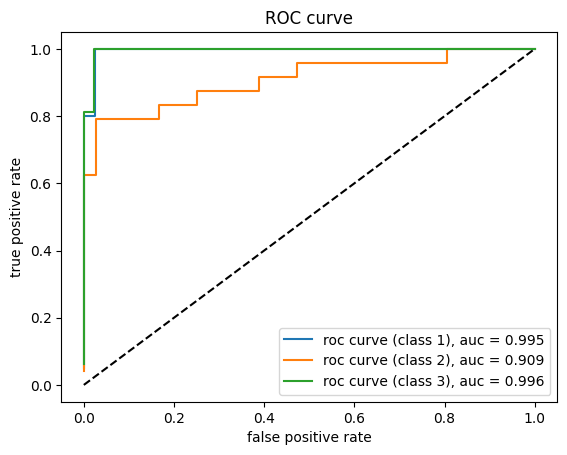

In [198]:
plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label='roc curve (class %d), auc = %0.3f'%(i+1, auc[i]))
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

# 拓展要求  

我们希望模型能兼顾precision和recall，但二者是矛盾的；如果模型要覆盖尽可能多的样本，就更容易犯错；反之如果它想保持准确率，就容易出现纰漏。要想找到平衡点，就必须遍历模型预测从保守到激进的区间。

ROC曲线的横坐标假阳率 fpr = fp/(fp+tn)，纵坐标真阳率（等于recall） tpr = tp/(tp+fn) 都是基于实际的正样本和负样本出发的，不受样本平衡程度的影响，即使有90%都是正样本，它们也只各自关注正样本和负样本的覆盖率，避免了像precision那样以预测值为条件的问题；前者表示模型虚报的程度（即，预测的激进程度），后者表示模型预测的覆盖程度，从低到高，显然越接近左上角表现就越好。AUC代表ROC曲线下方的面积，量化了这一表现的好坏。

总而言之，ROC曲线和AUC值对不平衡样本不敏感，因此可以很好地判断模型的总体表现。